# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name #why [0] and [1]
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

In [27]:
#To print Json data
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
#city_url = f"{url}appid={weather_api_key}&q={cities[1]}&units={units}"
city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

# Parse the JSON and retrieve data
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 40.2342,
        "lon": 69.6948
    },
    "dt": 1704284047,
    "id": 1538311,
    "main": {
        "feels_like": 4.5,
        "humidity": 49,
        "pressure": 1017,
        "temp": 8.1,
        "temp_max": 8.1,
        "temp_min": 8.1
    },
    "name": "Buston",
    "sys": {
        "country": "TJ",
        "id": 8998,
        "sunrise": 1704249831,
        "sunset": 1704283587,
        "type": 1
    },
    "timezone": 18000,
    "visibility": 6000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 7
    }
}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_data = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_data['coord']['lat']
        city_lng = city_weather_data['coord']['lon']
        city_max_temp = city_weather_data['main']['temp_max']
        city_humidity = city_weather_data['main']['humidity']
        city_clouds = city_weather_data['clouds']['all']
        city_wind = city_weather_data['wind']['speed']
        city_country = city_weather_data['sys']['country']
        city_date = city_weather_data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rokytne
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | fiambala
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | casper
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | cockburn town
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | freetown
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | hirara
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | borogontsy
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | vikhorevka
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of Set 1 | 

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rokytne,51.2796,27.2140,-0.18,97,100,5.51,UA,1704284047
1,bethel,41.3712,-73.4140,0.27,83,0,1.54,US,1704283634
2,fiambala,-27.6871,-67.6149,21.68,63,69,3.05,AR,1704284048
3,tiksi,71.6872,128.8694,-36.17,100,89,1.56,RU,1704283347
4,casper,42.8666,-106.3131,-4.04,66,0,4.12,US,1704284049


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rokytne,51.2796,27.2140,-0.18,97,100,5.51,UA,1704284047
1,bethel,41.3712,-73.4140,0.27,83,0,1.54,US,1704283634
2,fiambala,-27.6871,-67.6149,21.68,63,69,3.05,AR,1704284048
3,tiksi,71.6872,128.8694,-36.17,100,89,1.56,RU,1704283347
4,casper,42.8666,-106.3131,-4.04,66,0,4.12,US,1704284049


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

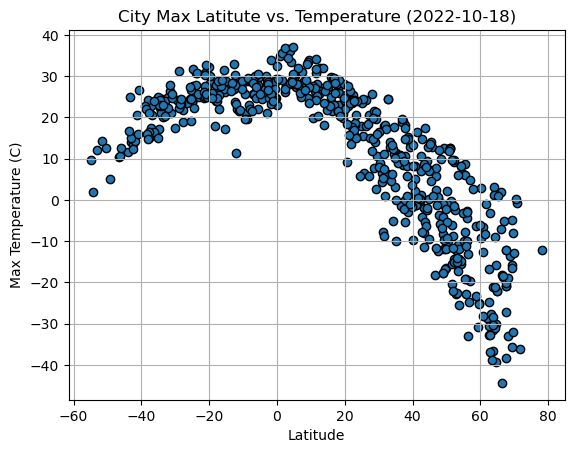

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolors= 'black')
            
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.title('City Max Latitute vs. Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

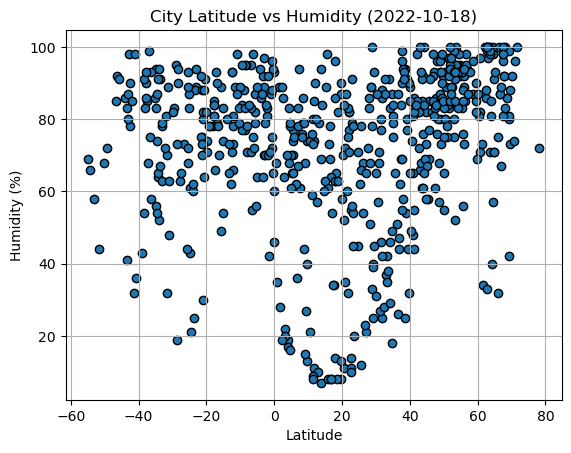

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

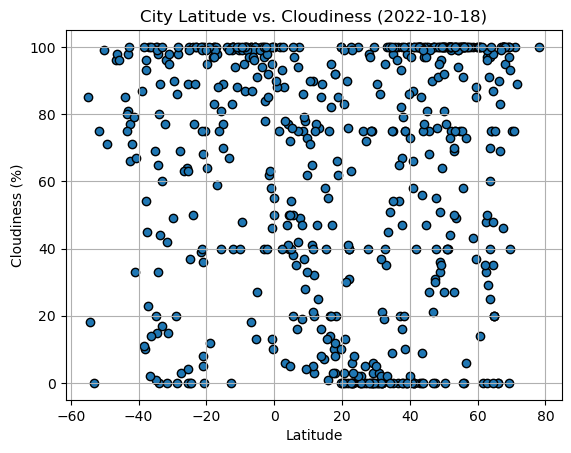

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

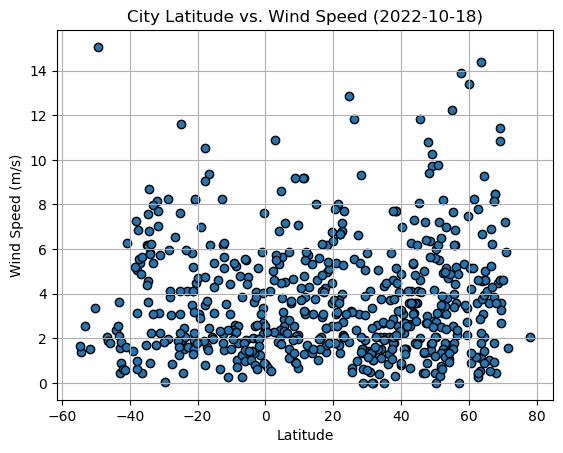

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"

    plt.scatter(x_axis, y_axis, marker = 'o', edgecolors='black')
    plt.plot(x_axis, p_fit, "-", color = 'red')
    plt.annotate(eq, eq_loc, fontsize = 12, color = 'red')
    print(f"The r-value is {round(correlation[0], 2)}")

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rokytne,51.2796,27.2140,-0.18,97,100,5.51,UA,1704284047
1,bethel,41.3712,-73.4140,0.27,83,0,1.54,US,1704283634
3,tiksi,71.6872,128.8694,-36.17,100,89,1.56,RU,1704283347
4,casper,42.8666,-106.3131,-4.04,66,0,4.12,US,1704284049
5,stanley,54.8680,-1.6985,6.27,95,75,1.54,GB,1704283629


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fiambala,-27.6871,-67.6149,21.68,63,69,3.05,AR,1704284048
8,bredasdorp,-34.5322,20.0403,22.30,74,100,7.56,ZA,1704283514
11,punta arenas,-53.1500,-70.9167,12.06,58,0,2.57,CL,1704283645
17,waitangi,-43.9535,-176.5597,11.57,86,85,2.37,NZ,1704283626
18,grytviken,-54.2811,-36.5092,1.86,66,18,1.40,GS,1704283626


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.88


Text(0, 0.5, 'Max Temp')

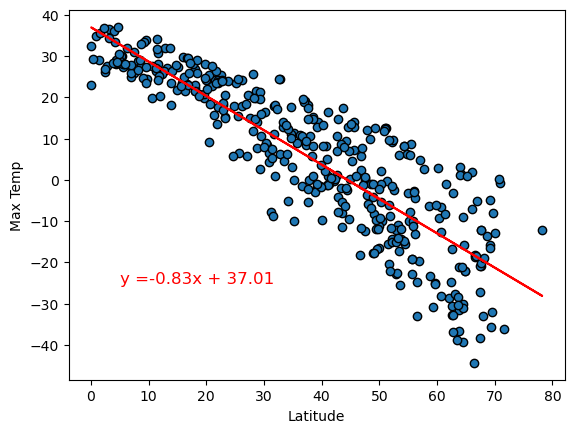

In [40]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (5, -25))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

The r-value is 0.64


Text(0, 0.5, 'Max Temp')

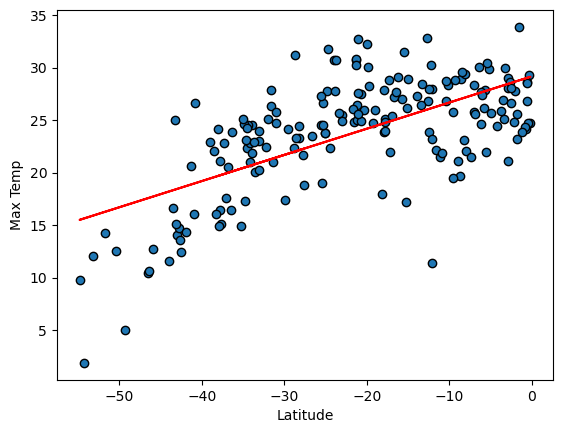

In [41]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-50, 40))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:**  In the Northern hemisphere, there is very a strong correlation between a city's latitude and it's max-temperature with r-value as 0.88. Also from the chart we can conclude that the cities closer to the equator have higher maximum temperature than the cities away from the equator. 
In the Southern hemisphere, the r-value is 0.64. Hence the city's latitude and it's max-temperature are moderately correlated. even though moderately correlated, from the chart we can say that the cities closer to the equator have higher maximum temperature than the cities away. The weaker correlation may be attributed to the fact that less cities exist closer to the South Pole 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.47


Text(0, 0.5, 'Humidity')

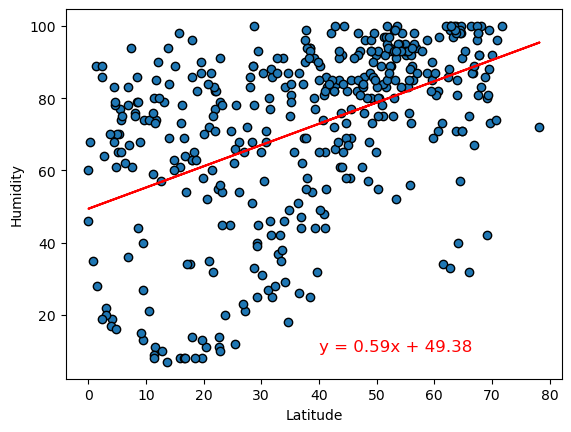

In [42]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (40, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

The r-value is 0.17


Text(0, 0.5, 'Humidity')

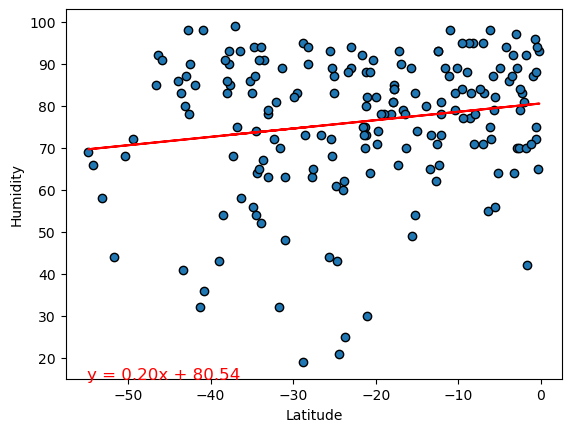

In [43]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55, 15))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** For both Northern and Southern hemispheres, the r-values are 0.47 and 0.17 respectively. Both the values are considered weak. From the chart, in North hemisphere, the cities closer to North pole may be high humid than  the cities closer to equator. In case of South hemisphere, the cities closer to equator may be high humid than the cities closer to south pole.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.28


Text(0, 0.5, 'Cloudiness')

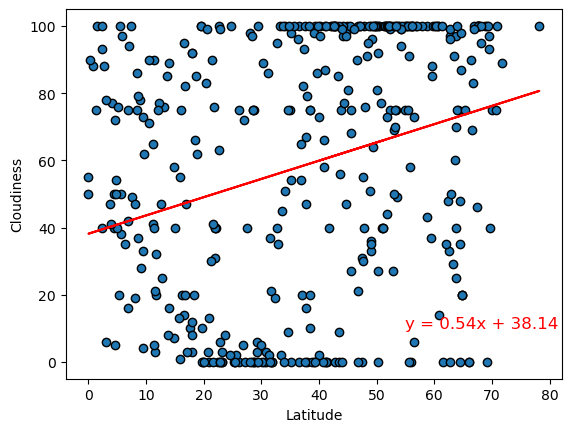

In [44]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (55, 10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

The r-value is 0.21


Text(0, 0.5, 'Cloudiness')

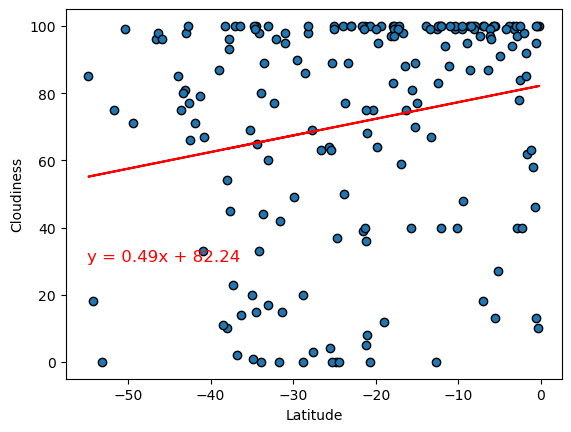

In [45]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-55, 30))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** The r-value for North hemisphere is 0.28, which is moderately correlated. The cities closer to North pole may have high cloudiness. 
In case of South hemisphere, the r-value is 0.21 which suggests the data ae weakly correlated. The latitude position may not be a factor for the cloud distribution. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.06


Text(0, 0.5, 'Wind Speed')

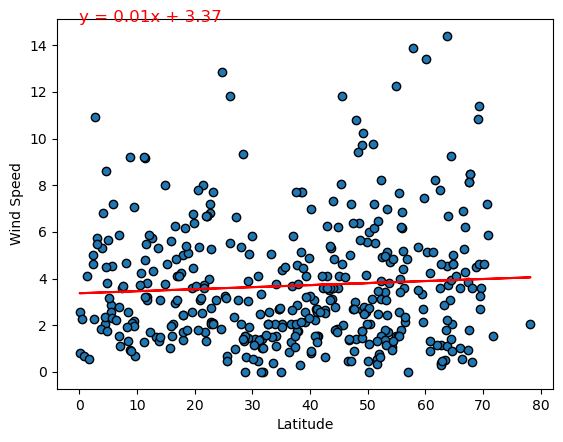

In [46]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (0, 15))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

The r-value is -0.11


Text(0, 0.5, 'Wind Speed')

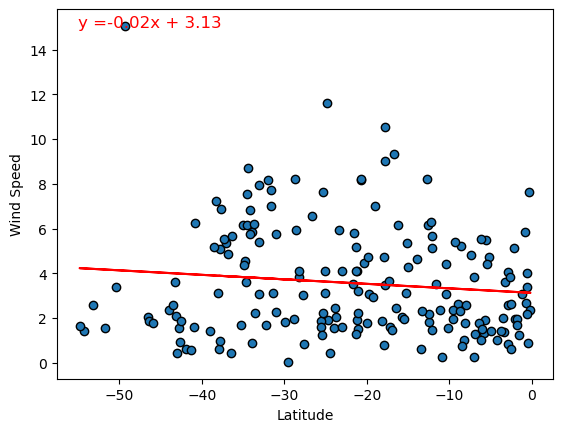

In [48]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-55, 15))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** In North hemispere, r-value is 0.06, which is considered as very weak. Also from the chart it appears there is almost no correlation between city's latitude position and the wind speed. In South hemisphere, r-value is 0.11, which is very weak correlated.  Also from the chart it appears there is almost no correlation between city's latitude position and the wind speed.